<a href="https://colab.research.google.com/github/saish15/Machine-Learning/blob/master/Predicting_Captchas_By_using_Machine_Learning_And_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"saishur","key":"97c36f52ccb038414d93918c82f58829"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)


In [0]:
import json
token = {"username":"saishur","key":"97c36f52ccb038414d93918c82f58829"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d fournierp/captcha-version-2-images -p /content --force

 52% 9.00M/17.4M [00:00<00:00, 12.8MB/s]
100% 17.4M/17.4M [00:00<00:00, 19.9MB/s]


In [0]:
!unzip \*.zip

Archive:  captcha-version-2-images.zip
replace samples/226md.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: samples/226md.png       
replace samples/22d5n.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: samples/22d5n.png       
replace samples/2356g.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: samples/2356g.png       
replace samples/23mdg.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: samples/23mdg.png       
replace samples/23n88.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: samples/23n88.png       
  inflating: samples/243mm.png       
  inflating: samples/244e2.png       
  inflating: samples/245y5.png       
  inflating: samples/24f6w.png       
  inflating: samples/24pew.png       
  inflating: samples/25257.png       
  inflating: samples/253dc.png       
  inflating: samples/25egp.png       
  inflating: samples/25m6p.png       
  inflating: samples/25p2m.png       
  inflating: samples/25w53.png       
  inflating: sampl

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
from re import match
from itertools import product, count, chain
from keras.utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [0]:
images = os.listdir('../content/samples/samples')
images

['ngn26.png',
 'xcf88.png',
 'dbny3.png',
 'n8fp6.png',
 'ee8fg.png',
 'n5w5g.png',
 'n4cpy.png',
 'x4f7g.png',
 'bx5ed.jpg',
 'pybee.png',
 'c6we6.png',
 'cpe63.png',
 'xe8xm.png',
 'xfg65.png',
 'bdg84.png',
 '664dn.png',
 '77387.png',
 'fp5wn.png',
 'bw6n6.png',
 'cdf77.png',
 'wxy4n.png',
 'p2ym2.png',
 'nfcwy.png',
 '4dgf7.png',
 '8gecm.png',
 'y4g3b.png',
 '3ygde.png',
 '23n88.png',
 'ydg8n.png',
 'exycn.png',
 'y5w28.png',
 'nd5wg.png',
 'wddcp.png',
 'xymfn.png',
 'y33nm.png',
 'x4pnp.png',
 '7y2x4.png',
 'pdcp4.png',
 '8gf7n.png',
 '78eec.png',
 '4ynf3.png',
 'nbmx7.png',
 '378e5.png',
 'x76mn.png',
 '23mdg.png',
 'gn2xy.png',
 'nbp3e.png',
 'yw7ny.png',
 'ng756.png',
 '28348.png',
 'bny23.png',
 'ef4mn.png',
 '573d8.png',
 '47m2b.png',
 'ndme7.png',
 'mwxwp.png',
 'nf2n8.png',
 'gnbde.png',
 'p4pde.png',
 'xw465.png',
 'ny8np.png',
 'bm3p8.png',
 'cx3wg.png',
 'dcnp8.png',
 '7p852.png',
 '6end3.png',
 'mm3nn.png',
 '5npdn.png',
 'wce5n.png',
 'cc845.png',
 'mw5p2.png',
 '5mgn

In [0]:
images = list(filter(lambda image: match('^[a-z0-9]+\..+$', image), images)) 

In [0]:
len(images) #find the length of an image

1070

In [0]:
texts = [match('^([a-z0-9]+)\..+$', image).group(1) for image in images] #extracting text from captcha

In [0]:
all([len(text) == 5 for text in texts]) #check the length of text this can be adjusted according to requirement

True

In [0]:
#Get unique characters present in the captcha
alphabet = list(frozenset(chain.from_iterable(texts)))
alphabet.sort()
''.join(alphabet)

'2345678bcdefgmnpwxy'

In [0]:
#Assign unique label integer value to every character in dataset
ids = dict([(ch, alphabet.index(ch)) for ch in alphabet])
ids['e']

10

In [0]:
def label_from_filename(path):
    label = [char for char in path.name[:-4]]
    return label

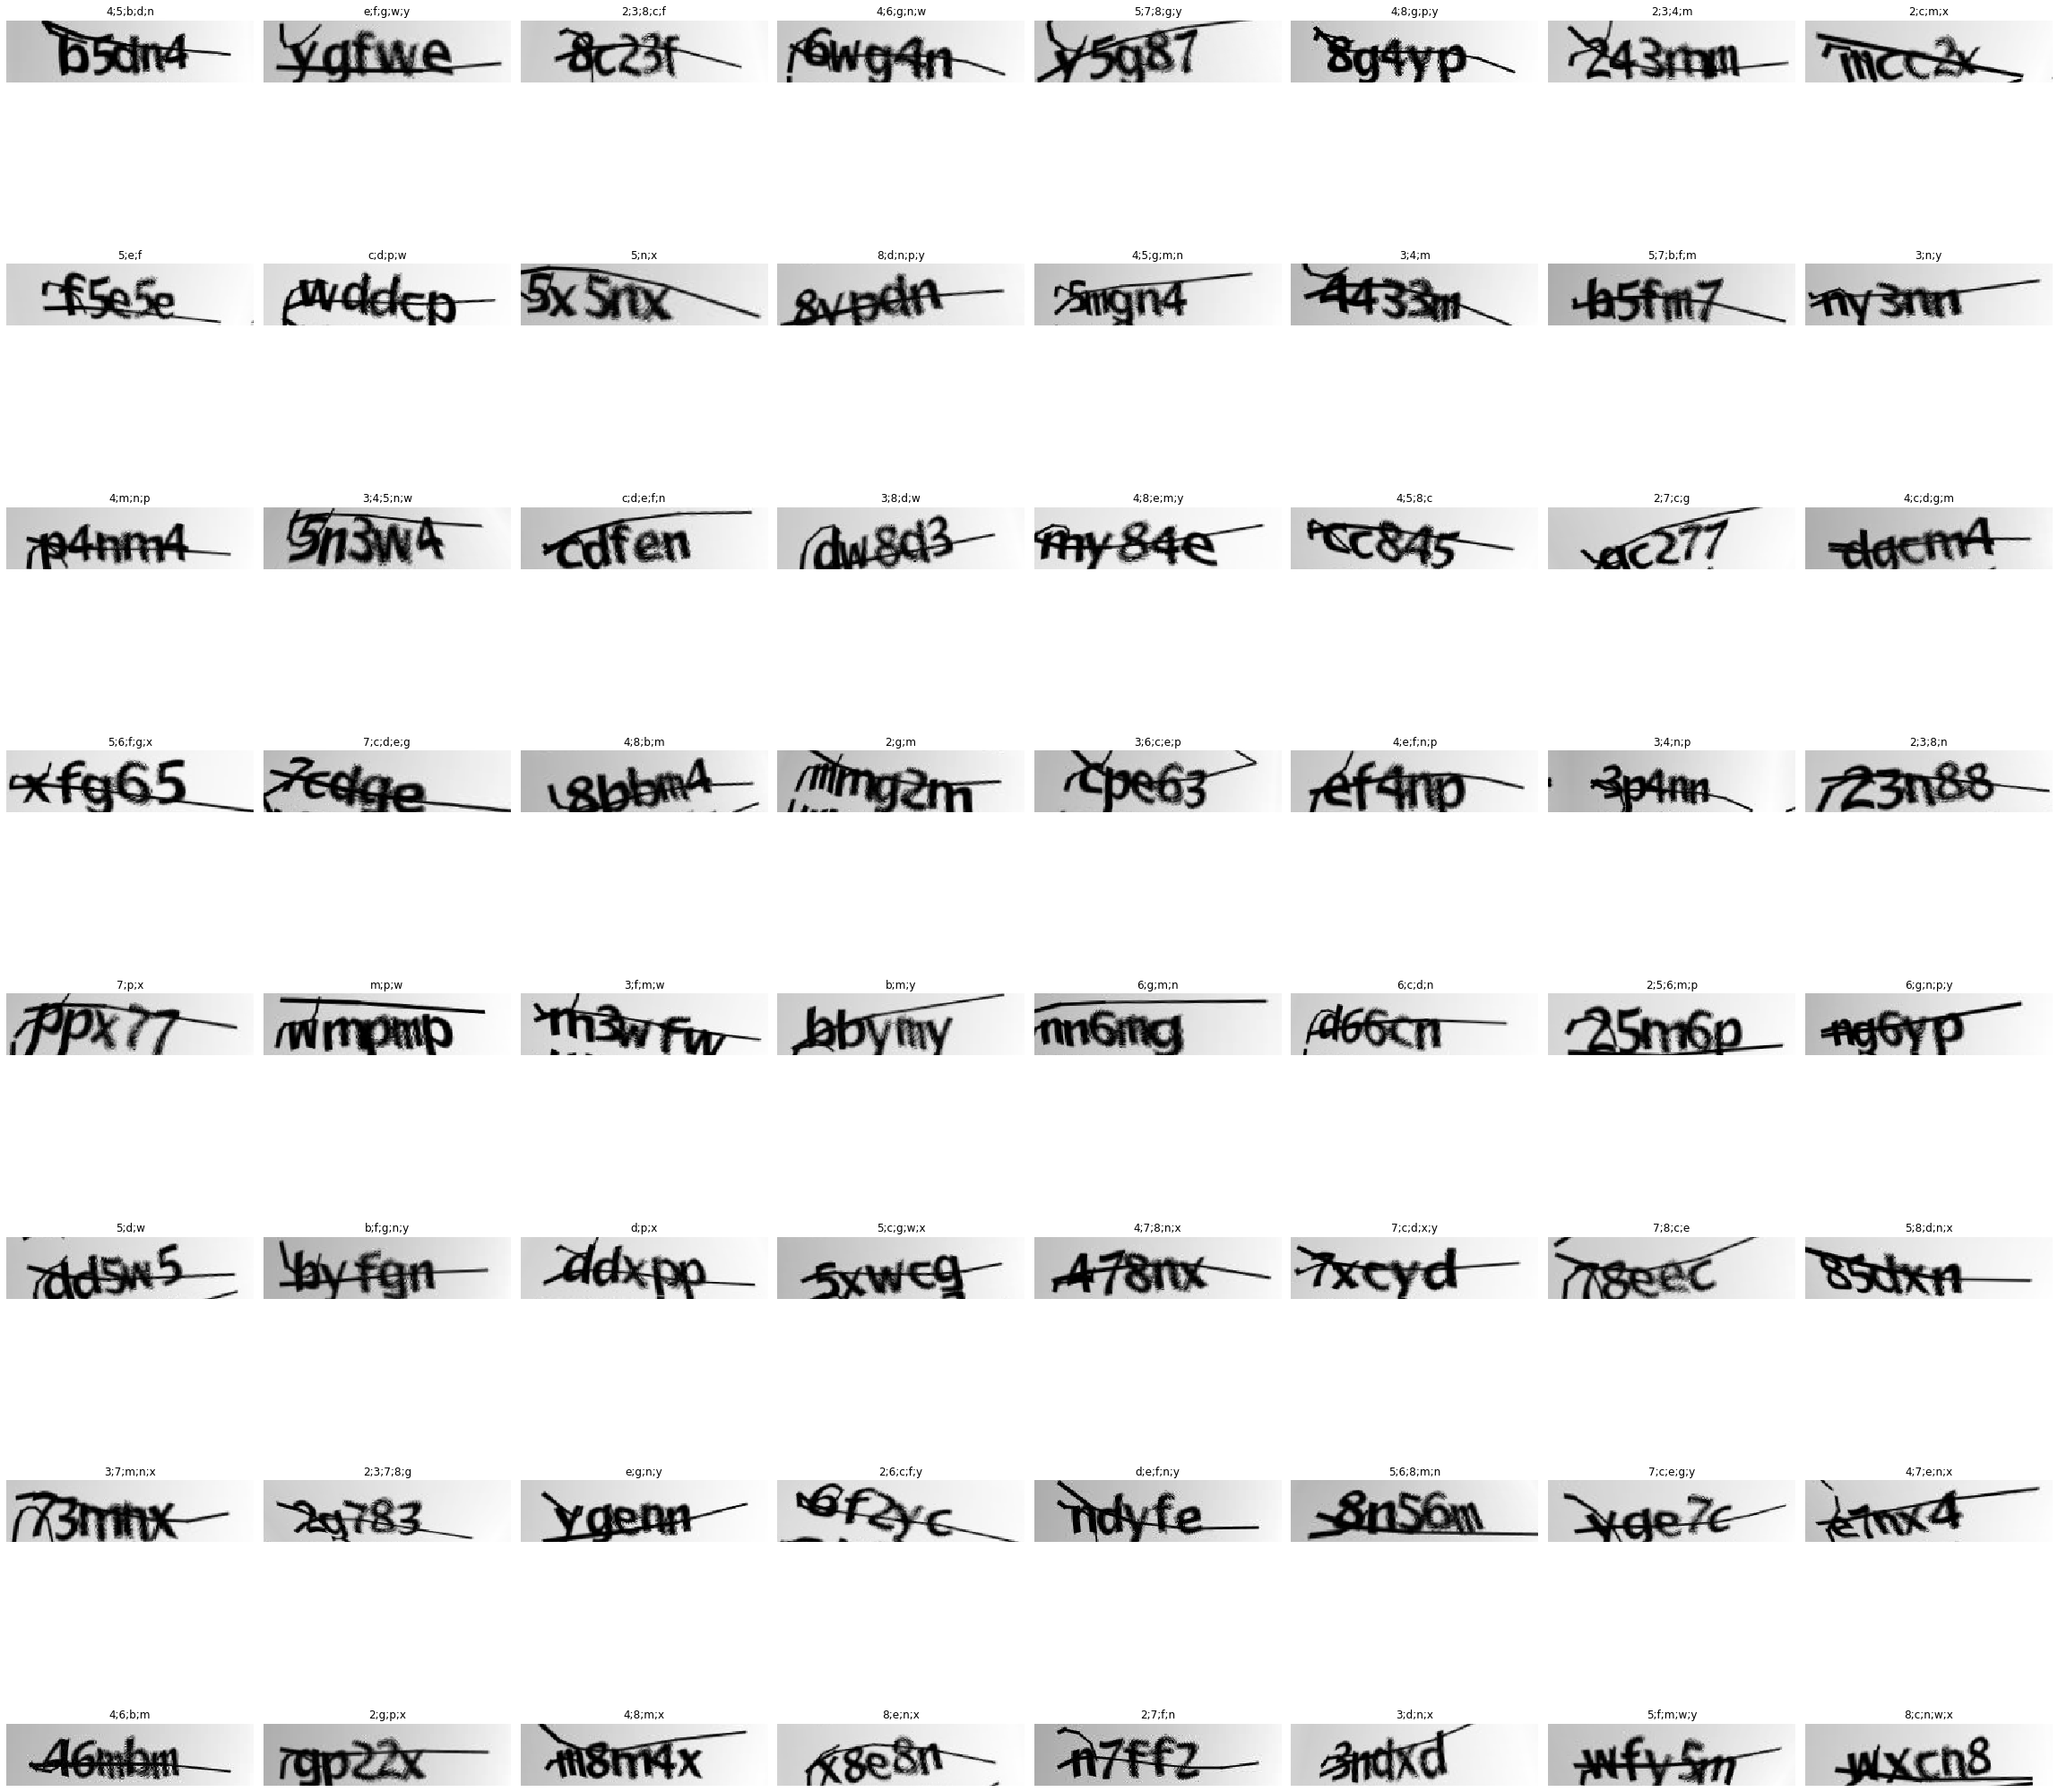

In [0]:
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_func(label_from_filename)
        .transform(get_transforms(do_flip=False))
        .databunch()
        .normalize()
       )
data.show_batch(8)

In [0]:
#Applying OpenCV for word segmentation
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import imutils
import zipfile

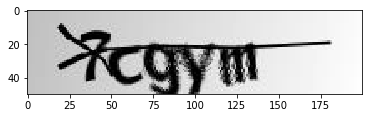

In [0]:
#Processing

#Gray scaling.
img = cv2.imread('../content/samples/samples/7cgym.png', 0)
plt.imshow(img, 'gray')

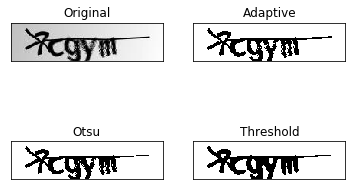

In [0]:

#Adaptive Thresholding
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)

# Otsu thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu thresholding with Gaussian Blur
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Plot
titles = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images = [img, th, th2, th3]
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.title('Threshold')
plt.show()

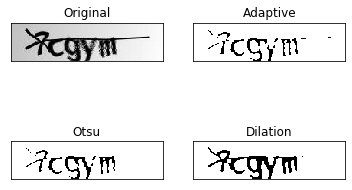

In [0]:
#Remove noise/line(morphological transformations)

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(th, kernel, iterations=1)
dilation2 = cv2.dilate(th2, kernel, iterations=1)
dilation3 = cv2.dilate(th3, kernel, iterations=1)

titles2 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images2 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Dilation')
plt.show()

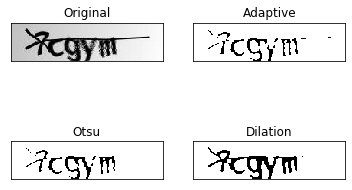

In [0]:
#Erosion and dilation because black characters on white background. Application of mathematics to traverse image of dimension n*m(3*3).

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(th, kernel, iterations=1)
dilation2 = cv2.dilate(th2, kernel, iterations=1)
dilation3 = cv2.dilate(th3, kernel, iterations=1)

titles2 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images2 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Dilation')
plt.show()

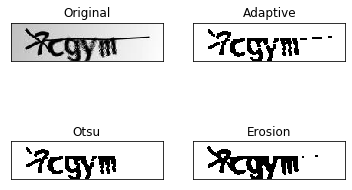

In [0]:
erosion = cv2.erode(dilation, kernel, iterations=1)
erosion2 = cv2.erode(dilation2, kernel, iterations=1)
erosion3 = cv2.erode(dilation3, kernel, iterations=1)

titles3 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images3 = [img, erosion, erosion2, erosion3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Erosion')
plt.show()

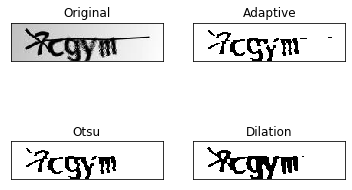

In [0]:
#Morphological transformation reducing size to 3*1 to reduce height

kernel = np.ones((3,1), np.uint8)
dilation = cv2.dilate(erosion, kernel, iterations=1)
dilation2 = cv2.dilate(erosion2, kernel, iterations=1)
dilation3 = cv2.dilate(erosion3, kernel, iterations=1)

titles4 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images4 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images4[i], 'gray')
    plt.title(titles4[i])
    plt.xticks([]), plt.yticks([])

plt.title('Dilation')
plt.show()

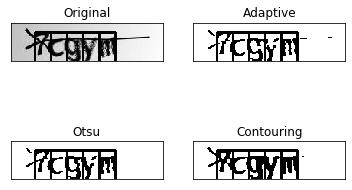

In [0]:
#using coordinates to adjust the bounded box across each alphabet as distance is almost same.

x, y, w, h = 31, 13, 21, 39
for  i in range(5):
    # get the bounding rect
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation3, (x, y), (x + w, y + h), (0, 255, 0), 2)
    x += w

titles3 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images3 = [img, dilation, dilation2, dilation3] #img, opening, opening2, opening3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])

plt.title('Contouring')
plt.show()

In [0]:
#split data to train test
def plot_lr(learn):
    lr_find(learn)
    learn.recorder.plot()

In [0]:
def char_from_path(path, position):
    return path.name[position]

In [0]:
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_func(partial(char_from_path, position=0))
        .transform(get_transforms(do_flip=False))
        .databunch()) 

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, model_dir='/tmp', ps=0.)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 46.8MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


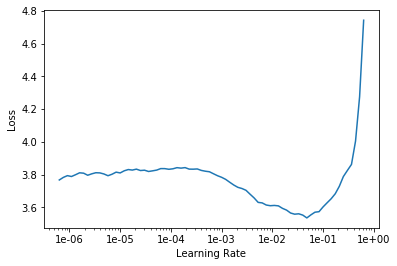

In [0]:
plot_lr(learn) #train data and plot graph of learn rate

In [0]:
lr = 5e-2    #learn for 5epochs(0-4) and display results
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.473728,29.503418,0.037383,00:54
1,4.359365,169.859116,0.037383,00:54
2,3.875055,11.061702,0.051402,00:54
3,3.325880,2.447361,0.289720,00:54
4,2.888649,1.937769,0.387850,00:54


In [0]:
learn.save('pretrained')

In [0]:
learn.load('pretrained')
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


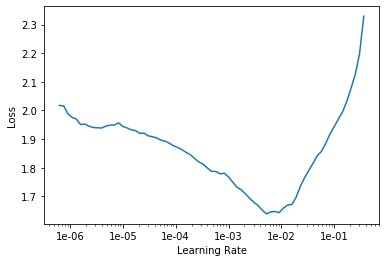

In [0]:
plot_lr(learn)

In [0]:
learn.fit_one_cycle(15, slice(5e-4, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.019925,0.004164,1.000000,01:19
1,0.024909,0.002299,1.000000,01:19
2,0.032022,0.060023,0.971963,01:19
3,0.082218,0.315234,0.911215,01:19
4,0.123596,0.424259,0.892523,01:19
5,0.165677,0.853182,0.766355,01:19
6,0.177911,0.157575,0.939252,01:19
7,0.183824,0.108847,0.967290,01:20
8,0.164702,0.013398,1.000000,01:20
9,0.143981,0.023641,0.990654,01:20


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


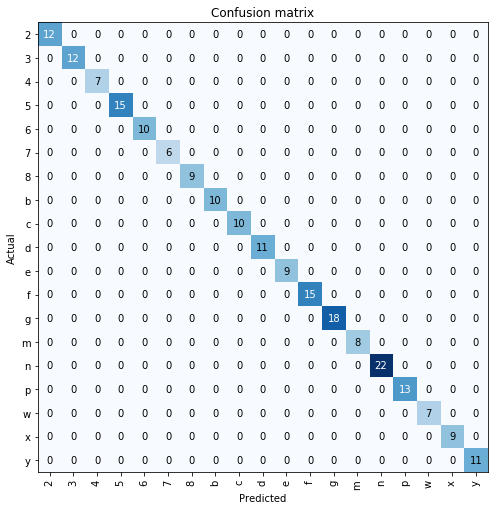

In [0]:
interp.plot_confusion_matrix(figsize=(7,7))

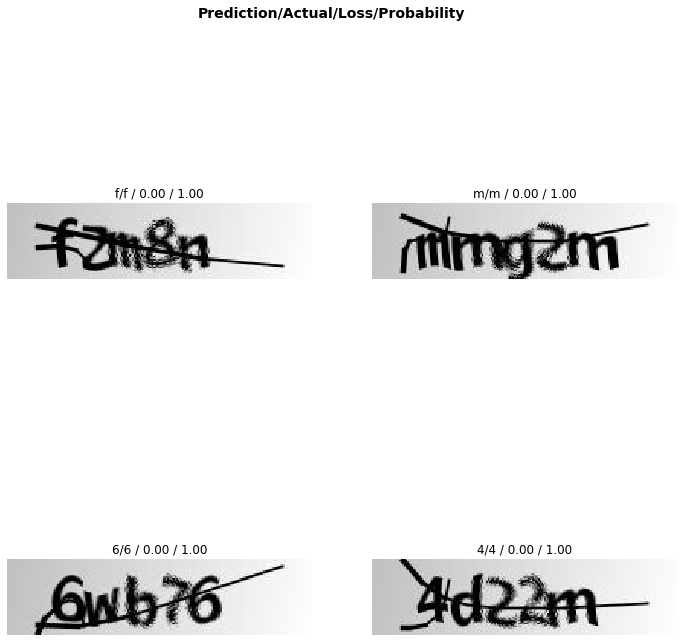

In [0]:
interp.plot_top_losses(4, heatmap_thresh=14, largest=False)

In [0]:
def data_from_position(position):
    data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_func(partial(char_from_path, position=position))
        .transform(get_transforms(do_flip=False))
        .databunch())
    return data

In [0]:
learners = []
for i in range(5):
    data = data_from_position(i)
    
    learn = cnn_learner(data, models.resnet34, metrics=accuracy, model_dir='/tmp', ps=0.)
    
    lr = 5e-2
    learn.fit_one_cycle(5, lr)
    
    learn.unfreeze()
    learn.fit_one_cycle(15, slice(5e-4, lr/5))
    
    learners.append(learn)

epoch,train_loss,valid_loss,accuracy,time
0,4.407639,11.888853,0.116822,00:55
1,4.325201,95.136024,0.056075,00:55
2,3.698656,10.366515,0.084112,00:55
3,3.116361,3.505964,0.242991,00:55
4,2.677292,1.604646,0.434579,00:55


epoch,train_loss,valid_loss,accuracy,time
0,1.607045,2.698454,0.392523,01:17
1,1.368195,4.102715,0.355140,01:17
2,1.202404,4.489828,0.331776,01:17
3,1.131051,2.854140,0.523364,01:17
4,1.005768,1.698011,0.556075,01:17
5,0.893926,2.119840,0.462617,01:17
6,0.783867,0.754518,0.742991,01:17
7,0.672268,0.414241,0.859813,01:17
8,0.552348,0.267104,0.911215,01:17
9,0.460950,0.172793,0.962617,01:17


epoch,train_loss,valid_loss,accuracy,time
0,4.306908,17.140711,0.051402,00:54
1,4.363282,24.216089,0.060748,00:54
2,3.891995,4.921458,0.084112,00:54
3,3.347454,2.245255,0.242991,00:54
4,2.931152,2.007931,0.271028,00:54


epoch,train_loss,valid_loss,accuracy,time
0,1.929812,1.828745,0.415888,01:16
1,1.695083,1.809570,0.448598,01:17
2,1.457754,2.953673,0.387850,01:17
3,1.327132,10.101795,0.214953,01:17
4,1.130554,2.344768,0.485981,01:17
5,0.949255,2.045166,0.462617,01:17
6,0.788296,0.349514,0.864486,01:17
7,0.654210,0.426500,0.850467,01:17
8,0.542189,0.353630,0.883178,01:17
9,0.452307,0.275199,0.911215,01:17


epoch,train_loss,valid_loss,accuracy,time
0,4.497024,16.142914,0.032710,00:54
1,4.438779,32.236053,0.065421,00:54
2,4.057968,7.522355,0.051402,00:54
3,3.577307,3.487031,0.130841,00:54
4,3.224828,2.784710,0.144860,00:54


epoch,train_loss,valid_loss,accuracy,time
0,2.356590,2.930457,0.228972,01:16
1,2.117392,3.834411,0.285047,01:17
2,1.832512,3.229370,0.271028,01:17
3,1.638296,3.938423,0.308411,01:17
4,1.392088,3.633082,0.429907,01:17
5,1.211836,2.739954,0.434579,01:17
6,1.034536,0.961038,0.691589,01:17
7,0.876814,2.094416,0.514019,01:17
8,0.717170,1.199089,0.677570,01:17
9,0.587258,0.461547,0.831776,01:17


epoch,train_loss,valid_loss,accuracy,time
0,4.392766,22.072916,0.060748,00:54
1,4.425676,18.461842,0.074766,00:54
2,3.863118,8.441193,0.088785,00:54
3,3.296796,3.617670,0.168224,00:54
4,2.873956,2.526676,0.219626,00:54


epoch,train_loss,valid_loss,accuracy,time
0,1.852432,2.957233,0.308411,01:16
1,1.632331,4.015779,0.257009,01:17
2,1.406258,2.566705,0.485981,01:16
3,1.204593,6.495700,0.210280,01:17
4,1.033495,4.605430,0.322430,01:17
5,0.854742,1.184632,0.668224,01:17
6,0.725830,1.429871,0.593458,01:17
7,0.613230,0.404421,0.841121,01:16
8,0.517324,0.474705,0.813084,01:17
9,0.428090,0.255586,0.887850,01:17


epoch,train_loss,valid_loss,accuracy,time
0,3.413896,13.058239,0.130841,00:55
1,2.711780,28.254988,0.051402,00:54
2,2.242650,13.594604,0.140187,00:54
3,1.641065,1.906375,0.560748,00:55
4,1.238008,0.333193,0.897196,00:55


epoch,train_loss,valid_loss,accuracy,time
0,0.447364,1.148951,0.686916,01:17
1,0.428502,16.005367,0.252336,01:17
2,0.431020,24.858763,0.219626,01:17
3,0.462116,22.473473,0.163551,01:17
4,0.436905,2.801260,0.514019,01:17
5,0.402367,0.917242,0.738318,01:17
6,0.351209,0.608514,0.780374,01:17
7,0.285550,0.093914,0.962617,01:17
8,0.231736,0.391267,0.920561,01:17
9,0.197185,0.061450,0.976636,01:17


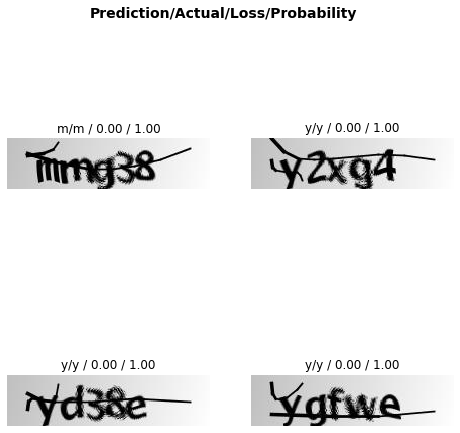

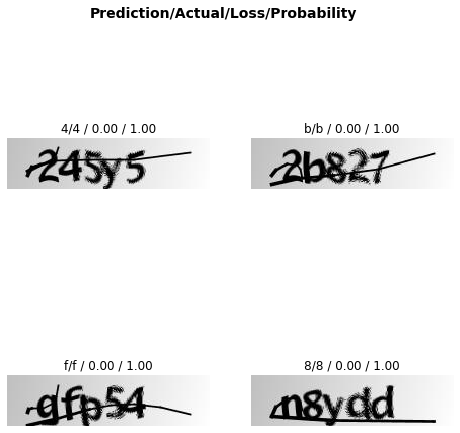

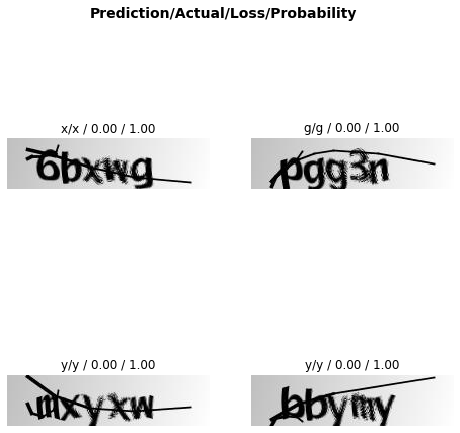

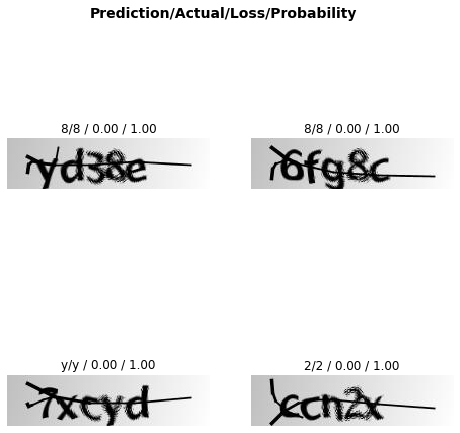

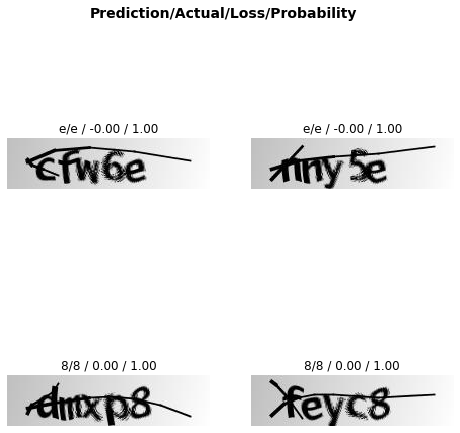

In [0]:
figures = []
for learner in learners:
    figures.append(learner.interpret().plot_top_losses(4, heatmap_thresh=14, figsize=(8,8), largest=False, return_fig=True))

In [0]:
for e,f in enumerate(figures):
    f.suptitle('')
    for a in f.axes: a.set_title(f'Position: {e+1}')
    f.savefig(f'{e}_heatmap.png', bbox_inches='tight')

In [0]:
def predict_captcha(img, learners):
    return ''.join([str(learner.predict(img)[0]) for learner in learners])

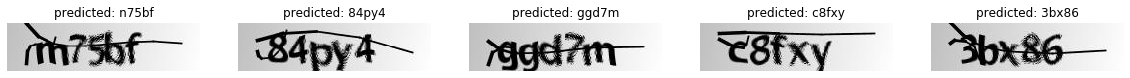

In [0]:
fig, ax = plt.subplots(ncols=5, figsize=(20,10))
for a, (img, lbl) in zip(ax.flatten(), learners[0].data.valid_ds):
    show_image(img, a)
    a.set_title(f'predicted: {predict_captcha(img, learners)}')
plt.show()

In [0]:
img_paths = learners[0].data.valid_ds.items
count = 0
correct = 0

for img_path in img_paths:
    lbl = img_path.name[:-4]
    img = open_image(img_path)
    predicted = predict_captcha(img, learners)
    if lbl==predicted: correct +=1
    count += 1
correct/count

0.9345794392523364